# ML Model predict the tags on Stack Overflow Questions & Answers

### Import the necessary libraries

In [1]:
import string
import re
import nltk
import pandas as pd
import csv

from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('names')
from nltk.corpus import stopwords
from nltk.corpus import names
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Aruna\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_colwidth', 150)

### (A) Read the CSV file

In [3]:
df = pd.read_csv("stack-overflow-data.csv")

df.head(10)

,post,tags
0,what is causing this behavior in our c# datetime type <pre><code>[test] public void sadness() { var datetime = datetime.utcnow; assert.tha...,c#
1,have dynamic html load as if it was in an iframe i have an asp.net 4.0 site. users can save an entire html page into the backend database. what i...,asp.net
2,how to convert a float value in to min:sec i m trying to convert my second in min:sec. my code is: <pre><code>- (ibaction)calcola:(id)sender ...,objective-c
3,.net framework 4 redistributable just wondering where we can get .net framework 4 beta redistributable. we would like to include it in our cd so ...,.net
4,trying to calculate and print the mean and its returning as a <function at> rather than a number python i have my program in python and i have u...,python
5,how to give alias name for my website i have deployed my asp.net site in one of our server which is in ip format. so i used to browse it like… <...,asp.net
6,window.open() returns null in angularjs it works in a simple call but returns null inside $http. how can i create a window if i need the result ...,angularjs
7,identifying server timeout quickly in iphone i am connecting my iphone application to jboss server. when the jboss server is down the iphone ti...,iphone
8,unknown method key error in rails 2.3.8 unit testing i was writing unit tests for my models for a while. after that i was tweaking around and ag...,ruby-on-rails
9,from the include how to show and hide the content according to the requirement i have a template in include. i am using that in 2 seperate inst...,angularjs


#### Check the spread of tags in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
post    40000 non-null object
tags    40000 non-null object
dtypes: object(2)
memory usage: 625.1+ KB


In [5]:
df['tags'].describe()

count     40000
unique       20
top          c#
freq       2000
Name: tags, dtype: object

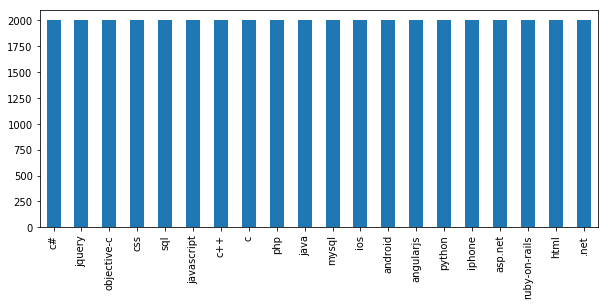

In [6]:
plt.figure(figsize=(10,4))
df.tags.value_counts().plot(kind='bar');

#### Check out one sample post

In [7]:
df['post'][0]

'what is causing this behavior  in our c# datetime type  <pre><code>[test] public void sadness() {    var datetime = datetime.utcnow;    assert.that(datetime  is.equalto(datetime.parse(datetime.tostring()))); } </code></pre>   failed :   <pre><code> expected: 2011-10-31 06:12:44.000  but was:  2011-10-31 06:12:44.350 </code></pre>   i wish to know what is happening behind the scenes in tostring() etc to cause this behavior.    edit after seeing jon s answer :   <pre><code>[test] public void newsadness() {     var datetime = datetime.utcnow;     assert.that(datetime  is.equalto(datetime.parse(datetime.tostring( o )))); } </code></pre>   result :   <pre><code>expected: 2011-10-31 12:03:04.161 but was:  2011-10-31 06:33:04.161 </code></pre>   same result with capital and small  o  . i m reading up the docs  but still unclear.'

#### Top 30 words + frequency of each:

In [8]:
freq = pd.Series(' '.join(df['post']).split()).value_counts()[:30]
freq

the              172157
i                148938
to               121253
=                 92928
a                 86281
is                71645
in                70612
and               61656
}                 61110
{                 61033
of                49233
</code></pre>     46644
it                43102
this              39083
for               35434
that              33771
if                31384
have              31015
my                27382
but               25926
on                24748
with              24450
how               24419
not               24008
from              23291
can               22629
&gt;              21865
as                19551
|                 19311
);                18456
dtype: int64

In [9]:
print("There are totally", df['post'].apply(lambda x: len(x.split(' '))).sum(), "words before cleaning.")

There are totally 10286120 words before cleaning.


### (B) Text Pre-processing

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,:;]')

BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

STOPWORDS = stopwords.words('english')

my_stop_words = ["hi", "hello", "regards", "thank", "thanks", "regard", "best", "wishes", "hey", "my", "do", "did",
                 "does", "had", "have", "has", "could", "can", "as", "is", "shall", "should", "would", "will", "you",
                 "me", "please", "know", "who", "we", "was", "were", "they"]

name = names.words()
STOPWORDS.extend(my_stop_words)
STOPWORDS.extend(name)

In [11]:
def cleantext(text):
    
    # step 1 convert the text to lowercase
    text = text.lower()
    
    # step 2 remove all the html tags
    text = BeautifulSoup(text, "lxml").text
    
    # step 3 replace unwanted symbols by space
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    
    # step 4 remove some symbols
    text = BAD_SYMBOLS_RE.sub('', text)
    
    #step 5 remove the stop words
    text = " ".join(x for x in text.split() if x not in STOPWORDS and len(x) > 1)
    
    return text

In [12]:
df['post'] = df['post'].apply(cleantext)


df['post'].head(20)

0     causing behavior c# datetime type test public void sadness var datetime datetimeutcnow assertthat datetime isequalto datetimeparse datetimetostrin...
1     dynamic html load iframe aspnet 40 site users save entire html page backend database want load dynamic content div existing page content area coup...
2     convert float value min sec trying convert second min sec code ibaction calcola id sender float grandezzakb fieldgrandezza text floatvalue float v...
3     net framework redistributable wondering get net framework beta redistributable like include cd distribute clients need install cd web necessary in...
4     trying calculate print mean returning rather number python program python used external file numbers created list numbers stored need find mean st...
5     give alias name website deployed aspnet site one server ip format used browse like http xxxxxxxx mysite want get ip give text achieve also cant ch...
6     windowopen returns null angularjs works simple call return

#### Top 30 words + frequency of occurence:

In [13]:
freq = pd.Series(' '.join(df['post']).split()).value_counts()[:30]
freq

class       27632
div         23373
int         21953
code        20275
function    18620
id          18609
new         18107
string      16822
name        15439
value       15065
using       15029
like        14865
return      14848
want        14508
get         14056
file        13743
error       12828
public      11710
text        11371
data        11334
table       11218
void        10768
type        10612
one         10201
use          9924
user         9758
android      9744
select       9352
var          9112
null         8967
dtype: int64

In [14]:
print("There are totally", df['post'].apply(lambda x: len(x.split(' '))).sum(), "words after cleaning.")

There are totally 3263665 words after cleaning.


### (C) Feature Engineering & Model Deployment

In [15]:
from sklearn.model_selection import train_test_split

X = df.post
y = df.tags
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

## Naive Bayes Classifier for Multinomial Models

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

nb = Pipeline([('vect', TfidfVectorizer()), ('clf', MultinomialNB())])

nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

predictions = nb.predict(X_test)

In [22]:
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

               precision    recall  f1-score   support

         .net       0.74      0.66      0.70       613
      android       0.95      0.87      0.91       620
    angularjs       0.96      0.92      0.94       587
      asp.net       0.81      0.77      0.79       586
            c       0.80      0.86      0.83       599
           c#       0.57      0.63      0.60       589
          c++       0.83      0.76      0.79       594
          css       0.82      0.90      0.86       610
         html       0.70      0.71      0.71       617
          ios       0.68      0.66      0.67       587
       iphone       0.70      0.67      0.68       611
         java       0.87      0.83      0.85       594
   javascript       0.79      0.79      0.79       619
       jquery       0.84      0.85      0.84       574
        mysql       0.85      0.83      0.84       584
  objective-c       0.69      0.70      0.69       578
          php       0.84      0.85      0.85       591
       py

## LogisticRegression Model

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', TfidfVectorizer()), ('clf', LogisticRegression(n_jobs = 1))])

logreg.fit(X_train, y_train)

C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False))])

In [21]:
predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

               precision    recall  f1-score   support

         .net       0.74      0.66      0.70       613
      android       0.95      0.87      0.91       620
    angularjs       0.96      0.92      0.94       587
      asp.net       0.81      0.77      0.79       586
            c       0.80      0.86      0.83       599
           c#       0.57      0.63      0.60       589
          c++       0.83      0.76      0.79       594
          css       0.82      0.90      0.86       610
         html       0.70      0.71      0.71       617
          ios       0.68      0.66      0.67       587
       iphone       0.70      0.67      0.68       611
         java       0.87      0.83      0.85       594
   javascript       0.79      0.79      0.79       619
       jquery       0.84      0.85      0.84       574
        mysql       0.85      0.83      0.84       584
  objective-c       0.69      0.70      0.69       578
          php       0.84      0.85      0.85       591
       py

## Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([('vect', TfidfVectorizer()), ('clf', RandomForestClassifier())])

rf.fit(X_train, y_train)

C:\Users\Aruna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [27]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

               precision    recall  f1-score   support

         .net       0.40      0.60      0.48       613
      android       0.71      0.76      0.73       620
    angularjs       0.80      0.84      0.82       587
      asp.net       0.57      0.62      0.59       586
            c       0.63      0.82      0.71       599
           c#       0.42      0.36      0.39       589
          c++       0.74      0.59      0.66       594
          css       0.62      0.76      0.69       610
         html       0.53      0.45      0.48       617
          ios       0.51      0.45      0.48       587
       iphone       0.53      0.49      0.51       611
         java       0.73      0.71      0.72       594
   javascript       0.66      0.54      0.60       619
       jquery       0.75      0.75      0.75       574
        mysql       0.74      0.74      0.74       584
  objective-c       0.64      0.60      0.62       578
          php       0.84      0.76      0.80       591
       py

## Linear SVC Model

In [29]:
from sklearn.svm import LinearSVC

svm = Pipeline([('vect', TfidfVectorizer()), ('clf', LinearSVC())])

svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [30]:
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))
print('accuracy:', accuracy_score(predictions, y_test))

               precision    recall  f1-score   support

         .net       0.75      0.66      0.70       613
      android       0.93      0.91      0.92       620
    angularjs       0.97      0.95      0.96       587
      asp.net       0.81      0.80      0.80       586
            c       0.78      0.86      0.82       599
           c#       0.64      0.61      0.63       589
          c++       0.82      0.77      0.79       594
          css       0.81      0.89      0.85       610
         html       0.72      0.72      0.72       617
          ios       0.67      0.63      0.65       587
       iphone       0.68      0.66      0.67       611
         java       0.84      0.85      0.85       594
   javascript       0.78      0.80      0.79       619
       jquery       0.86      0.87      0.86       574
        mysql       0.84      0.83      0.83       584
  objective-c       0.70      0.68      0.69       578
          php       0.83      0.86      0.84       591
       py

## XGBoost Model